In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime, timedelta
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
def import_raw_data():
    """
    Imports data from the ODI-2025.csv file without modifying it, aside from column names.

    :return: The contents of ODI-2025.csv as a pandas dataframe.
    """
    usecols = ['Timestamp',
               'What programme are you in?',
               'Have you taken a course on machine learning?',
               'Have you taken a course on information retrieval?',
               'Have you taken a course on statistics?',
               'Have you taken a course on databases?',
               'What is your gender?',
               'I have used ChatGPT to help me with some of my study assignments ',
               'When is your birthday (date)?',
               'How many students do you estimate there are in the room?',
               'What is your stress level (0-100)?',
               'How many hours per week do you do sports (in whole hours)? ',
               'Give a random number',
               'Time you went to bed Yesterday',
               'What makes a good day for you (1)?',
               'What makes a good day for you (2)?']
    names = ['timestamp',
             'programme',
             'machine_learning',
             'information_retrieval',
             'statistics',
             'databases',
             'gender',
             'chatgpt',
             'birthday',
             'student_estimate',
             'stress',
             'sports',
             'random_number',
             'bedtime',
             'good_day_1',
             'good_day_2']

    df = pd.read_csv('files/ODI-2025.csv', usecols=usecols, sep=';')
    df.columns = names
    return df


def save_dataframe_to_file(df, filename):
    """
    Saves a pandas dataframe to the file DMT_Data.csv with separator ;.

    :param df: Pandas dataframe
    """
    df.to_csv('files/' + filename, index=False, sep=';')

def import_data(filename):
    return pd.read_csv('files/' + filename, sep=';')
    

def import_clean_data():
    return pd.read_csv('files/DMT_Data.csv', sep=';')

df = import_data('DMT_Data_Median.csv')
print(df)

               timestamp                programme machine_learning  \
0    2025-04-01 12:17:00  Artificial Intelligence              yes   
1    2025-04-01 12:17:00  Artificial Intelligence              yes   
2    2025-04-01 12:17:00             Econometrics              yes   
3    2025-04-01 12:17:00             Econometrics              yes   
4    2025-04-01 12:17:00           Bioinformatics              yes   
..                   ...                      ...              ...   
237  2025-04-01 12:20:00  Artificial Intelligence               no   
238  2025-04-01 12:20:00         Computer Science              yes   
239  2025-04-01 12:21:00         Computer Science              yes   
240  2025-04-01 12:21:00         Computer Science              yes   
241  2025-04-01 12:21:00    Computational Science               no   

    information_retrieval statistics databases  gender             chatgpt  \
0                 unknown        yes       yes    male                 yes   
1  

In [3]:
def bin_stress(val):
    if val <= 33:
        return 'Low'
    elif val <= 66:
        return 'Medium'
    else:
        return 'High'

df['stress_class'] = df['stress'].apply(bin_stress)
#df['stress_class'] = pd.qcut(df['stress'], q=3, labels=['Low', 'Medium', 'High'])

print(df)

def bedtime_to_hour(t):
    h, m = map(int, t.split(':'))
    return h + (m / 60)
df['bedtime_hour'] = df['bedtime'].apply(bedtime_to_hour)

df

               timestamp                programme machine_learning  \
0    2025-04-01 12:17:00  Artificial Intelligence              yes   
1    2025-04-01 12:17:00  Artificial Intelligence              yes   
2    2025-04-01 12:17:00             Econometrics              yes   
3    2025-04-01 12:17:00             Econometrics              yes   
4    2025-04-01 12:17:00           Bioinformatics              yes   
..                   ...                      ...              ...   
237  2025-04-01 12:20:00  Artificial Intelligence               no   
238  2025-04-01 12:20:00         Computer Science              yes   
239  2025-04-01 12:21:00         Computer Science              yes   
240  2025-04-01 12:21:00         Computer Science              yes   
241  2025-04-01 12:21:00    Computational Science               no   

    information_retrieval statistics databases  gender             chatgpt  \
0                 unknown        yes       yes    male                 yes   
1  

,timestamp,programme,machine_learning,information_retrieval,statistics,databases,gender,chatgpt,birthday,student_estimate,stress,sports,random_number,bedtime,good_day_1,good_day_2,age,stress_class,bedtime_hour
0,2025-04-01 12:17:00,Artificial Intelligence,yes,unknown,yes,yes,male,yes,1888-01-01,400.0,78.0,0.0,928393.0,00:00,Food,Travel,23.0,High,0.0
1,2025-04-01 12:17:00,Artificial Intelligence,yes,yes,no,yes,female,yes,2002-01-31,321.0,40.0,2.0,31.416,00:30,sun,coffee,23.0,Medium,0.5
2,2025-04-01 12:17:00,Econometrics,yes,yes,yes,yes,male,not willing to say,NaN,200.0,40.0,4.0,5.0,00:30,Zonnetje,Aperol,23.0,Medium,0.5
3,2025-04-01 12:17:00,Econometrics,yes,no,yes,no,male,yes,2003-10-17,350.0,60.0,6.0,37.0,23:00,Sun,Sun,21.0,Medium,23.0
4,2025-04-01 12:17:00,Bioinformatics,yes,yes,yes,yes,male,yes,2000-04-19,500.0,50.0,8.0,1.0,00:00,-,-,24.0,Medium,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2025-04-01 12:20:00,Artificial Intelligence,no,yes,yes,yes,male,yes,1905-06-25,550.0,40.0,0.0,0.0,04:00,Free time,I get a lot done,23.0,Medium,4.0
238,2025-04-01 12:20:00,Computer Science,yes,yes,yes,yes,male,not willing to say,2127-04-01,460.0,60.0,5.0,56.0,01:30,Good gym session,Sun and a chest PR,23.0,Medium,1.5
239,2025-04-01 12:21:00,Computer Science,yes,no,no,yes,male,not willing to say,2003-01-09,300.0,35.0,5.0,69.0,02:00,beer in the sun,2 beers in the sun,22.0,Medium,2.0
240,2025-04-01 12:21:00,Computer Science,yes,yes,yes,yes,female,yes,2002-08-27,450.0,75.0,5.0,88.0,23:30,Have free time to chill,Smoke,22.0,High,23.5


In [4]:
features = ['age','sports','bedtime_hour','programme']
factor = 'stress_class'

programme_map = {
    'Artificial Intelligence': 0,
    'Computer Science': 1,
    'Computational Science': 2,
    'Econometrics': 3,
    'Finance': 4,
    'Business Analytics': 5,
    'Bioinformatics': 6,
    'Other': 7
}

df['programme_encoded'] = df['programme'].map(programme_map)

df

,timestamp,programme,machine_learning,information_retrieval,statistics,databases,gender,chatgpt,birthday,student_estimate,stress,sports,random_number,bedtime,good_day_1,good_day_2,age,stress_class,bedtime_hour,programme_encoded
0,2025-04-01 12:17:00,Artificial Intelligence,yes,unknown,yes,yes,male,yes,1888-01-01,400.0,78.0,0.0,928393.0,00:00,Food,Travel,23.0,High,0.0,0
1,2025-04-01 12:17:00,Artificial Intelligence,yes,yes,no,yes,female,yes,2002-01-31,321.0,40.0,2.0,31.416,00:30,sun,coffee,23.0,Medium,0.5,0
2,2025-04-01 12:17:00,Econometrics,yes,yes,yes,yes,male,not willing to say,NaN,200.0,40.0,4.0,5.0,00:30,Zonnetje,Aperol,23.0,Medium,0.5,3
3,2025-04-01 12:17:00,Econometrics,yes,no,yes,no,male,yes,2003-10-17,350.0,60.0,6.0,37.0,23:00,Sun,Sun,21.0,Medium,23.0,3
4,2025-04-01 12:17:00,Bioinformatics,yes,yes,yes,yes,male,yes,2000-04-19,500.0,50.0,8.0,1.0,00:00,-,-,24.0,Medium,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2025-04-01 12:20:00,Artificial Intelligence,no,yes,yes,yes,male,yes,1905-06-25,550.0,40.0,0.0,0.0,04:00,Free time,I get a lot done,23.0,Medium,4.0,0
238,2025-04-01 12:20:00,Computer Science,yes,yes,yes,yes,male,not willing to say,2127-04-01,460.0,60.0,5.0,56.0,01:30,Good gym session,Sun and a chest PR,23.0,Medium,1.5,1
239,2025-04-01 12:21:00,Computer Science,yes,no,no,yes,male,not willing to say,2003-01-09,300.0,35.0,5.0,69.0,02:00,beer in the sun,2 beers in the sun,22.0,Medium,2.0,1
240,2025-04-01 12:21:00,Computer Science,yes,yes,yes,yes,female,yes,2002-08-27,450.0,75.0,5.0,88.0,23:30,Have free time to chill,Smoke,22.0,High,23.5,1


In [5]:
X = df[[ 'programme_encoded','age','sports', 'bedtime_hour']]
y = df['stress_class']

Now all the data is ready to use in the decision tree algortihm first split into training data and test data with 20% test data the rest training data. 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

check for best depth so how many splits it will make and look at highest accuracy to determine, we see the accuracy increases with increasing depth but reaches a plateau at about depth = 14 so we use that one in further analysis and in the tree

In [7]:
depth = [4,6,8,10,12,14,16,18,20,22,24,26,28,30]
for i in depth:
    clf = tree.DecisionTreeClassifier(max_depth = i)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test, y_pred))

0.32653061224489793
0.3469387755102041
0.40816326530612246
0.40816326530612246
0.42857142857142855
0.5102040816326531
0.42857142857142855
0.4489795918367347
0.4489795918367347
0.42857142857142855
0.4489795918367347
0.4489795918367347
0.4489795918367347
0.4489795918367347


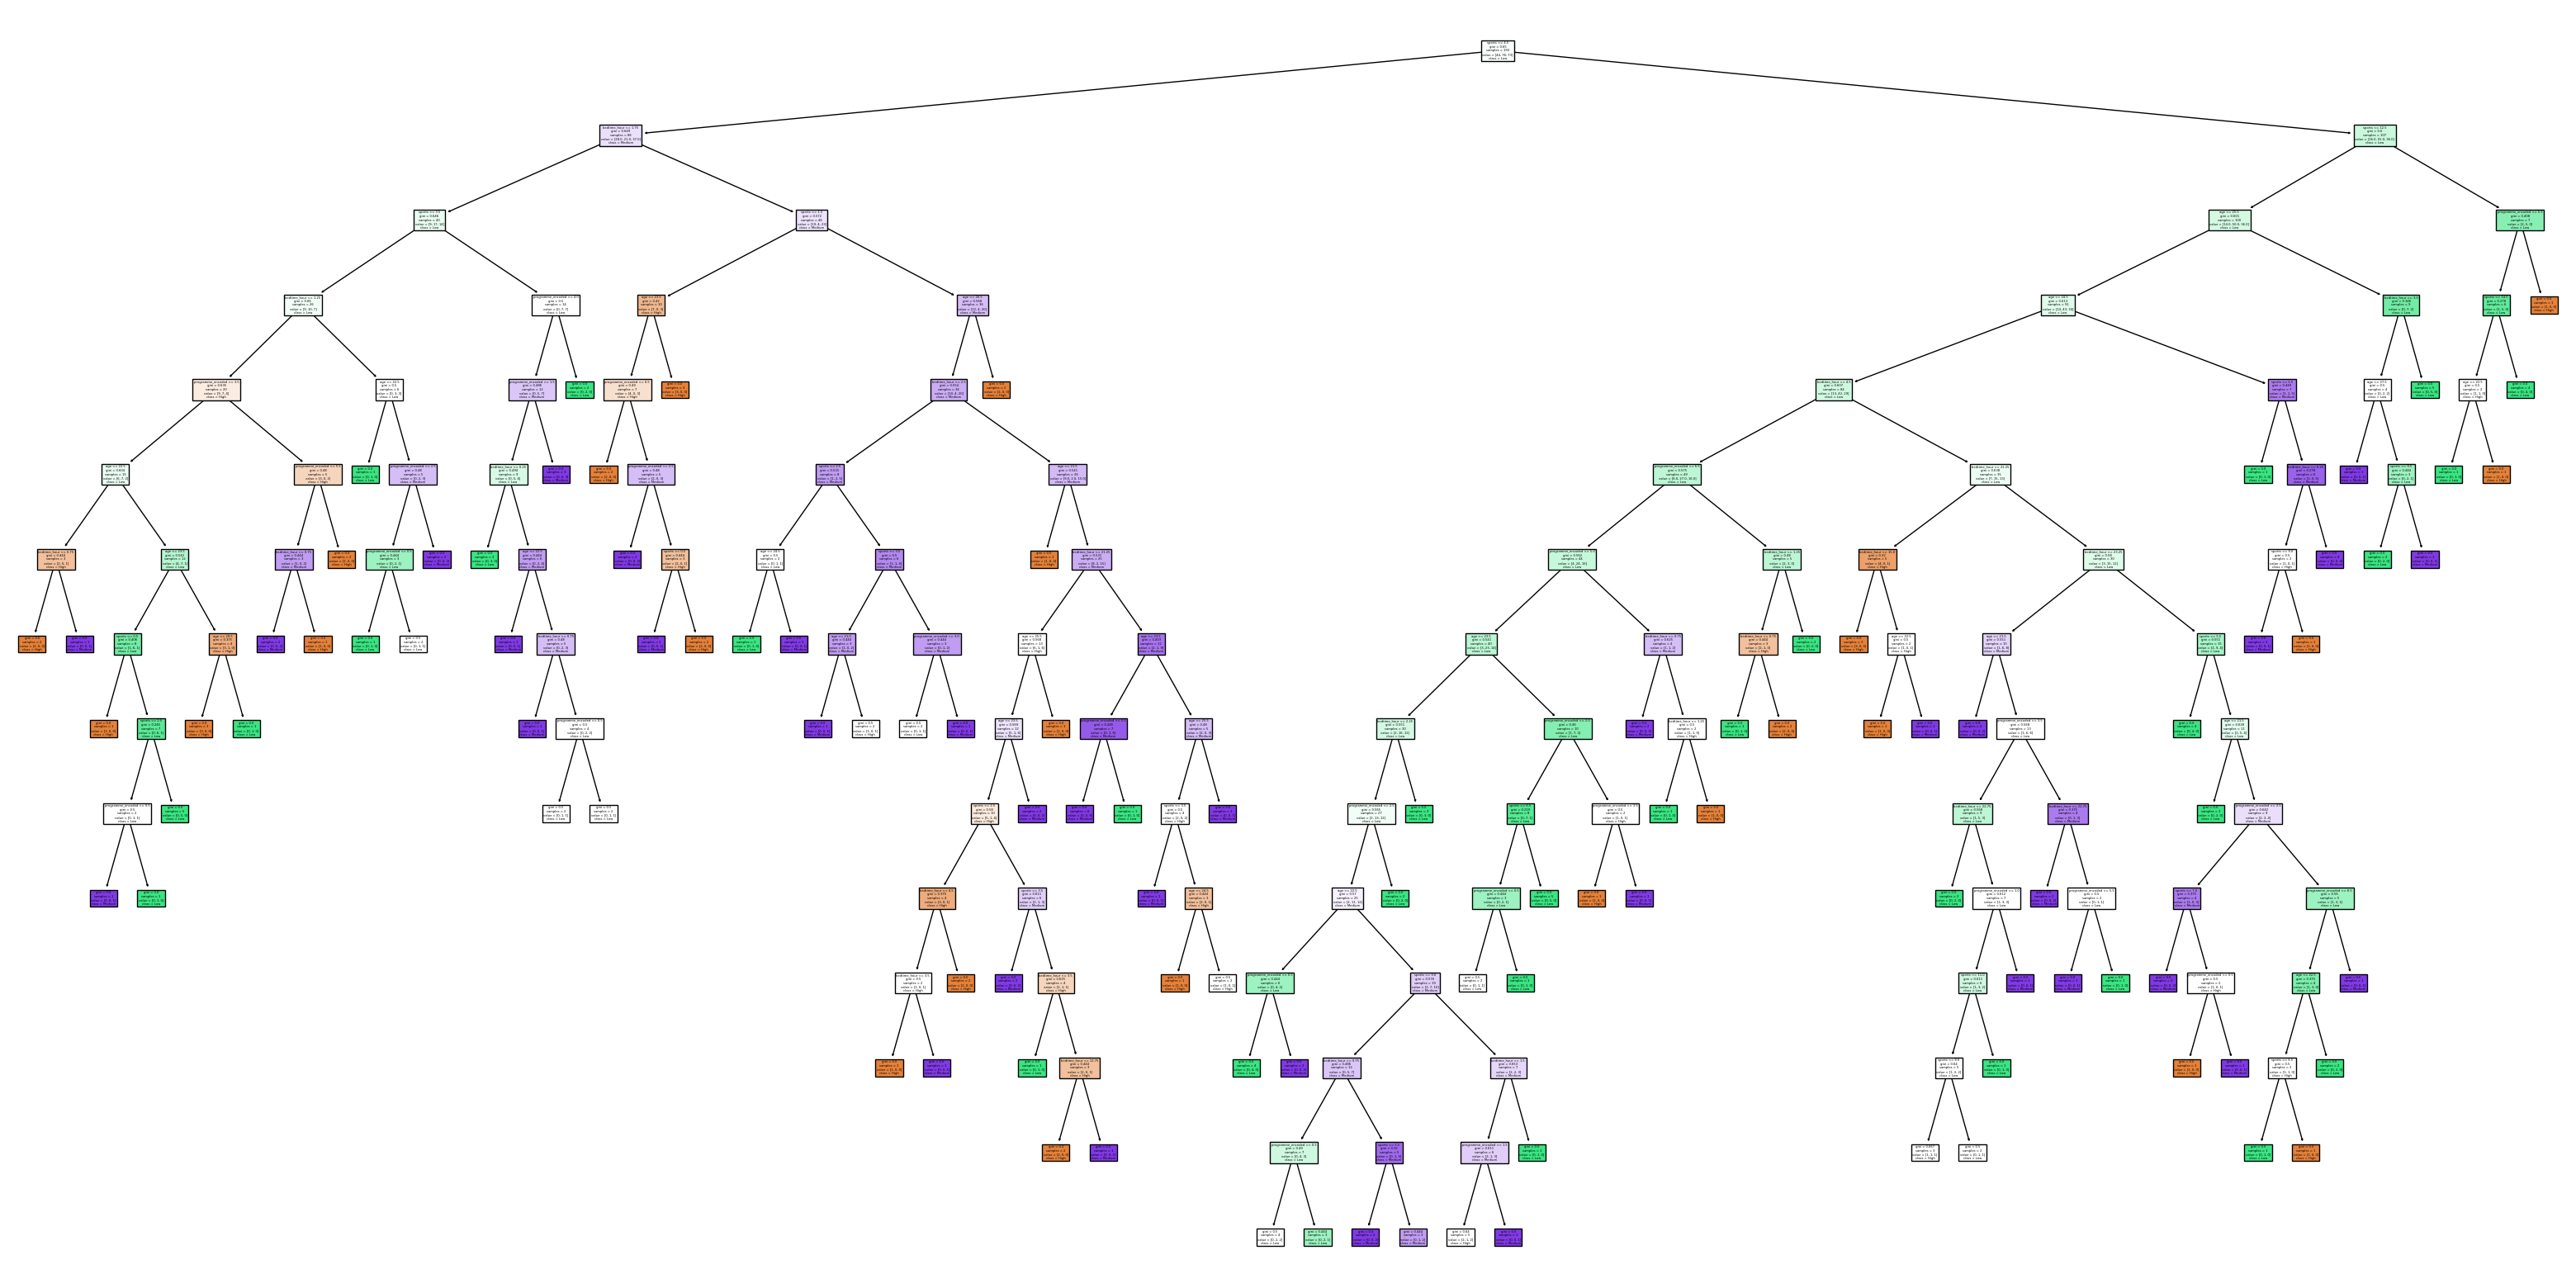

In [8]:
clf = tree.DecisionTreeClassifier(max_depth = 14)
clf = clf.fit(X_train, y_train)
plt.figure(figsize=(40, 20)) 
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
plt.savefig("figures/decision_tree_onlyage.png", dpi=300)
plt.show()

In [9]:
y_pred = clf.predict(X_test)
print("Accuracy:")
print(accuracy_score(y_test, y_pred))

Accuracy:
0.5102040816326531


An accuracy of 51% is achieved where about half of the test data is correctly predicted this is not high enough. to try to improve this we tried to add the gender also in there but this decreased the accuracy, when the stress level was introduced in a way where 1/3 of quantile of most answers was used this was also not improving the accuracy. maybe bed time improving by 3 classes early bedtime (18-22:30), middle bedtime(23-1), late bedtime (1-6)

(array([97., 37., 11., 10.,  8.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  2.,  9., 65.]),
 array([ 0.   ,  1.175,  2.35 ,  3.525,  4.7  ,  5.875,  7.05 ,  8.225,
         9.4  , 10.575, 11.75 , 12.925, 14.1  , 15.275, 16.45 , 17.625,
        18.8  , 19.975, 21.15 , 22.325, 23.5  ]),
 <BarContainer object of 20 artists>)

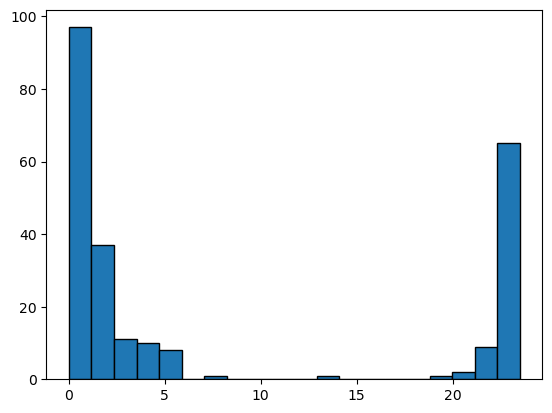

In [10]:
df_bedtime = df['bedtime_hour'].dropna()
plt.hist(df_bedtime, bins=20, edgecolor='black')